### Importing the necessary libraries

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Read the image file

In [34]:
img = np.array(Image.open("./flower.jpeg").convert('L'))

In [35]:
type(img)

numpy.ndarray

In [36]:
img.shape

(1500, 1200)

### Showing the image

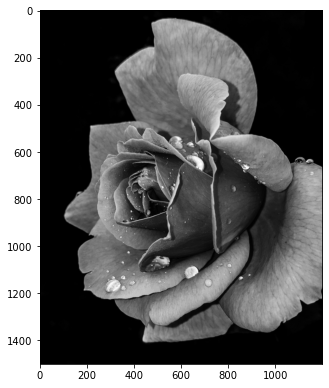

In [37]:
plt.figure(figsize = (8,6.5))
plt.imshow(img, cmap = 'gray')

### Setting up the filters

In [38]:
filter1 = np.asarray([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

filter2 = np.asarray([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

filter3 = np.asarray([[1, 1, 1],
                      [1, -8,1],
                      [1, 1, 1]])

filter4 = np.asarray([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]])

### Convolving with first filter

Text(0.5, 1.0, 'Convolved image with filter-1')

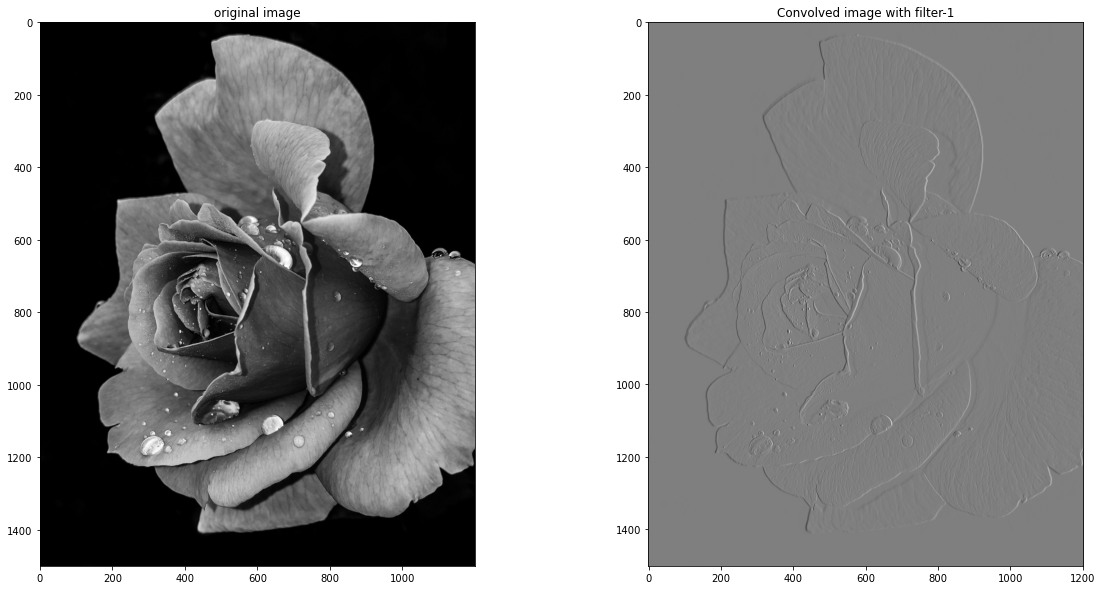

In [39]:
from scipy.signal import convolve2d

conv_img1 = convolve2d(img, filter1)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('original image')

plt.subplot(122)
plt.imshow(conv_img1, cmap = 'gray')
plt.title('Convolved image with filter-1')


### Convolving with second filter

Text(0.5, 1.0, 'Convolved image with filter-2')

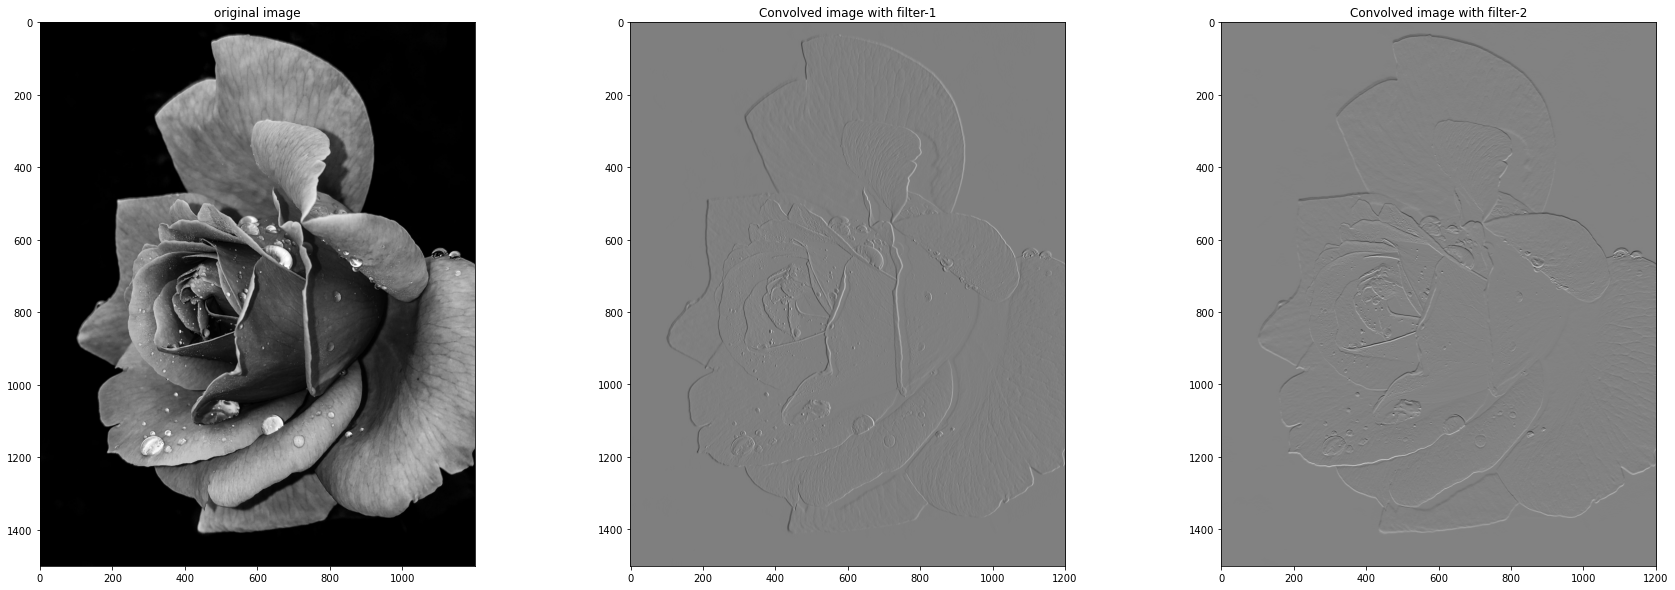

In [40]:
conv_img2 = convolve2d(img, filter2)

plt.figure(figsize=(30, 10))
plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('original image')

plt.subplot(132)
plt.imshow(conv_img1, cmap = 'gray')
plt.title('Convolved image with filter-1')

plt.subplot(133)
plt.imshow(conv_img2, cmap = 'gray')
plt.title('Convolved image with filter-2')

### Convolving with third filter

Text(0.5, 1.0, 'Convolved image with filter-3')

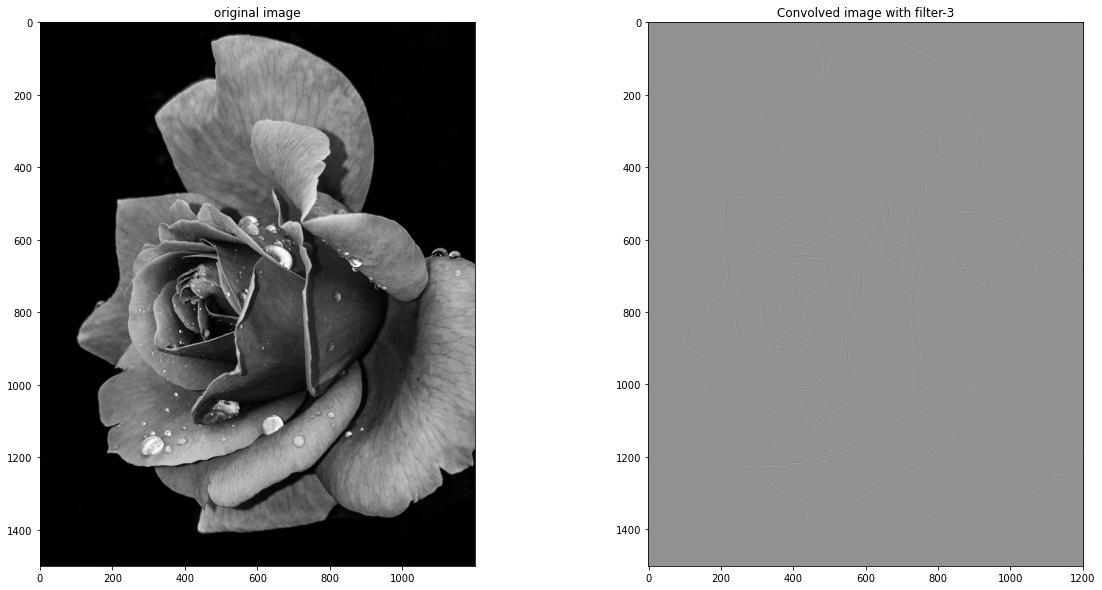

In [41]:
conv_img3 = convolve2d(img, filter3)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('original image')

plt.subplot(122)
plt.imshow(conv_img3, cmap = 'gray')
plt.title('Convolved image with filter-3')


### Convolving with fourth filter

Text(0.5, 1.0, 'Convolved image with filter-4')

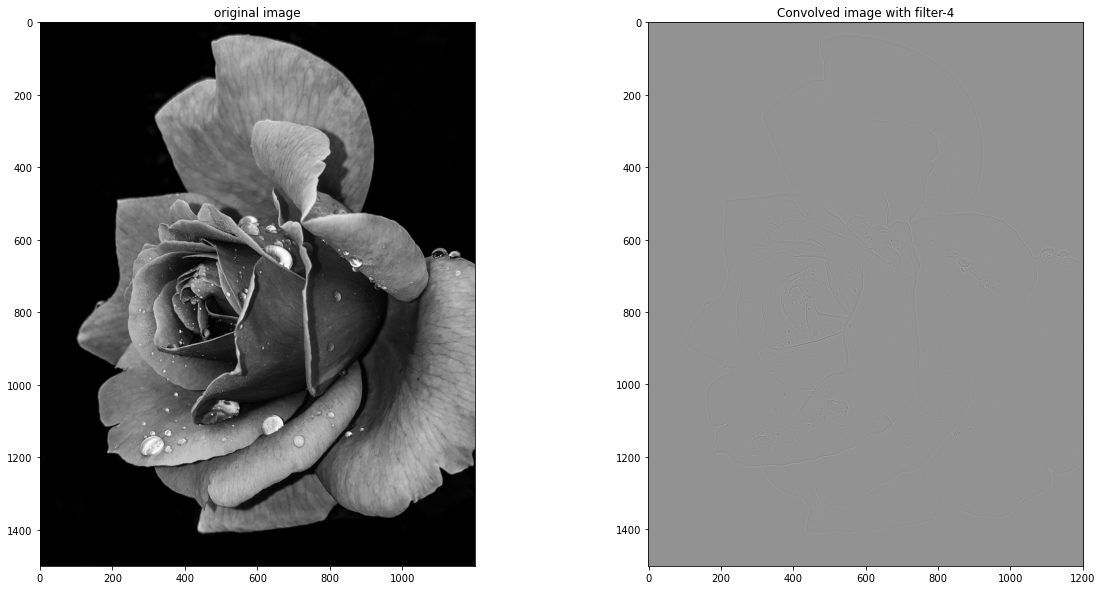

In [42]:
conv_img4 = convolve2d(img, filter4)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('original image')

plt.subplot(122)
plt.imshow(conv_img3, cmap = 'gray')
plt.title('Convolved image with filter-4')

### multiple convolution

In [43]:
f1 = np.asarray([[1, 0, -1],
                 [2, 0, -2],
                 [1, 0, -1]])

f2 = np.asarray([[1, 2, 1],
                 [0, 0, 0],
                 [-1, 2, -1]])

Text(0.5, 1.0, 'Convolved image after applying two filters')

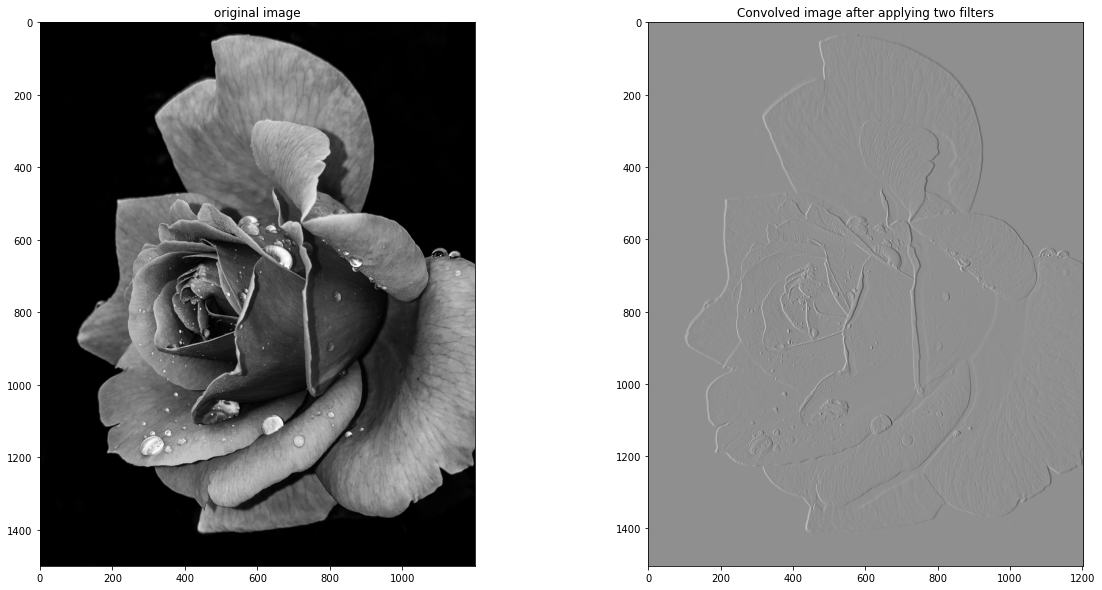

In [44]:
inter_img_1 = convolve2d(img, f1)
final_img = convolve2d(inter_img_1, f2)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('original image')

plt.subplot(122)
plt.imshow(final_img, cmap = 'gray')
plt.title('Convolved image after applying two filters')

### Defining max-pooling operation

In [45]:
def pooling(feature_map, size=2, stride=2):

    #Preparing the output of the pooling operation.

    pool_out = np.zeros((np.uint16((feature_map.shape[0]-size+1)/stride+1),
                         np.uint16((feature_map.shape[1]-size+1)/stride+1),
                         feature_map.shape[-1]))

    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in np.arange(0,feature_map.shape[0]-size+1, stride):
            c2 = 0
            for c in np.arange(0, feature_map.shape[1]-size+1, stride):
                pool_out[r2, c2, map_num] = np.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1

    return pool_out

In [46]:
row = conv_img1.shape[0]
col = conv_img1.shape[1]

pool1 = pooling(conv_img1.reshape(row,col,1))
pool2 = pooling(conv_img2.reshape(row,col,1))
pool3 = pooling(conv_img3.reshape(row,col,1))
pool4 = pooling(conv_img4.reshape(row,col,1))

pool1 = pool1.reshape(pool1.shape[0],pool1.shape[1])
pool2 = pool2.reshape(pool2.shape[0],pool2.shape[1])
pool3 = pool3.reshape(pool3.shape[0],pool3.shape[1])
pool4 = pool4.reshape(pool4.shape[0],pool4.shape[1])

### Pooling after convolution with first filter

Text(0.5, 1.0, 'Image after max-pooling')

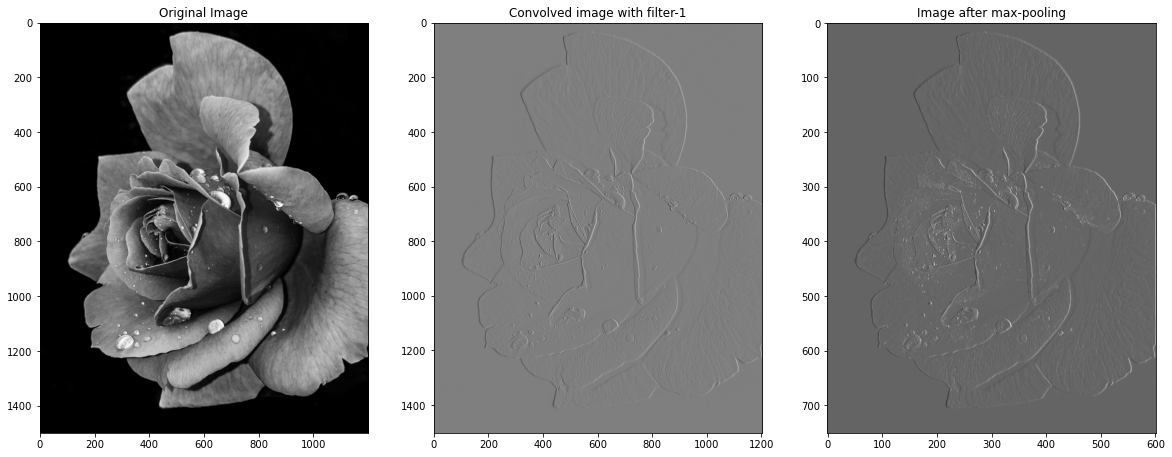

In [47]:
plt.figure(figsize=(20,10))

plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(conv_img1, cmap = 'gray')
plt.title('Convolved image with filter-1')

plt.subplot(133)
plt.imshow(pool1, cmap = 'gray')
plt.title('Image after max-pooling')

### Pooling after convolution with second filter

Text(0.5, 1.0, 'Image after max-pooling')

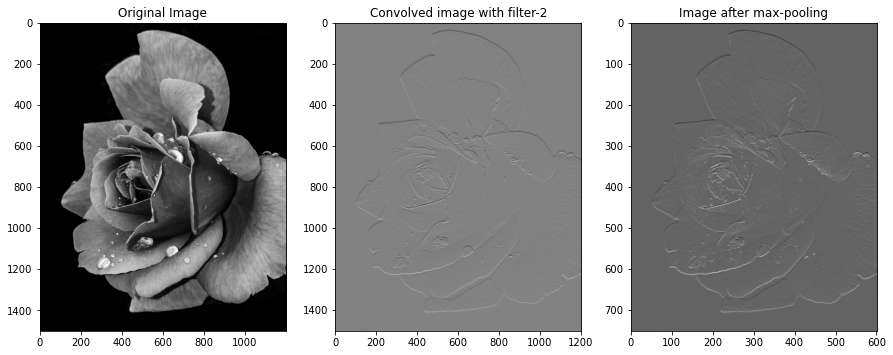

In [48]:
plt.figure(figsize=(15,10))

plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(conv_img2, cmap = 'gray')
plt.title('Convolved image with filter-2')

plt.subplot(133)
plt.imshow(pool2, cmap = 'gray')
plt.title('Image after max-pooling')

### Pooling after convolution with third filter

Text(0.5, 1.0, 'Image after max-pooling')

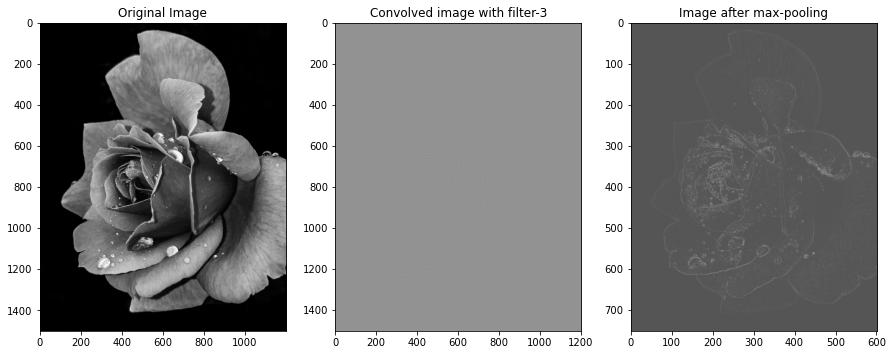

In [49]:
plt.figure(figsize=(15,10))

plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(conv_img3, cmap = 'gray')
plt.title('Convolved image with filter-3')

plt.subplot(133)
plt.imshow(pool3, cmap = 'gray')
plt.title('Image after max-pooling')

### Pooling after convolution with fourth filter

Text(0.5, 1.0, 'Image after max-pooling')

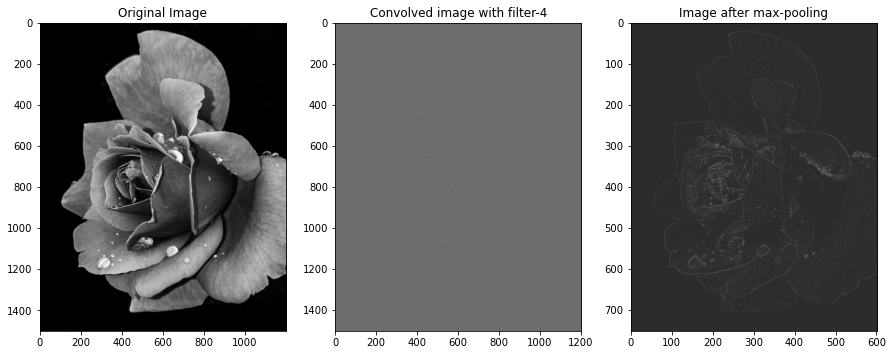

In [50]:
plt.figure(figsize=(15,10))

plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(conv_img4, cmap = 'gray')
plt.title('Convolved image with filter-4')

plt.subplot(133)
plt.imshow(pool4, cmap = 'gray')
plt.title('Image after max-pooling')